<a href="https://colab.research.google.com/github/Hajira-max/Codsoft-/blob/main/Untitled16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]


Upload an image (or cancel to stop)...


Saving nature-2ygv7ssy2k0lxlzu.jpg to nature-2ygv7ssy2k0lxlzu (1).jpg


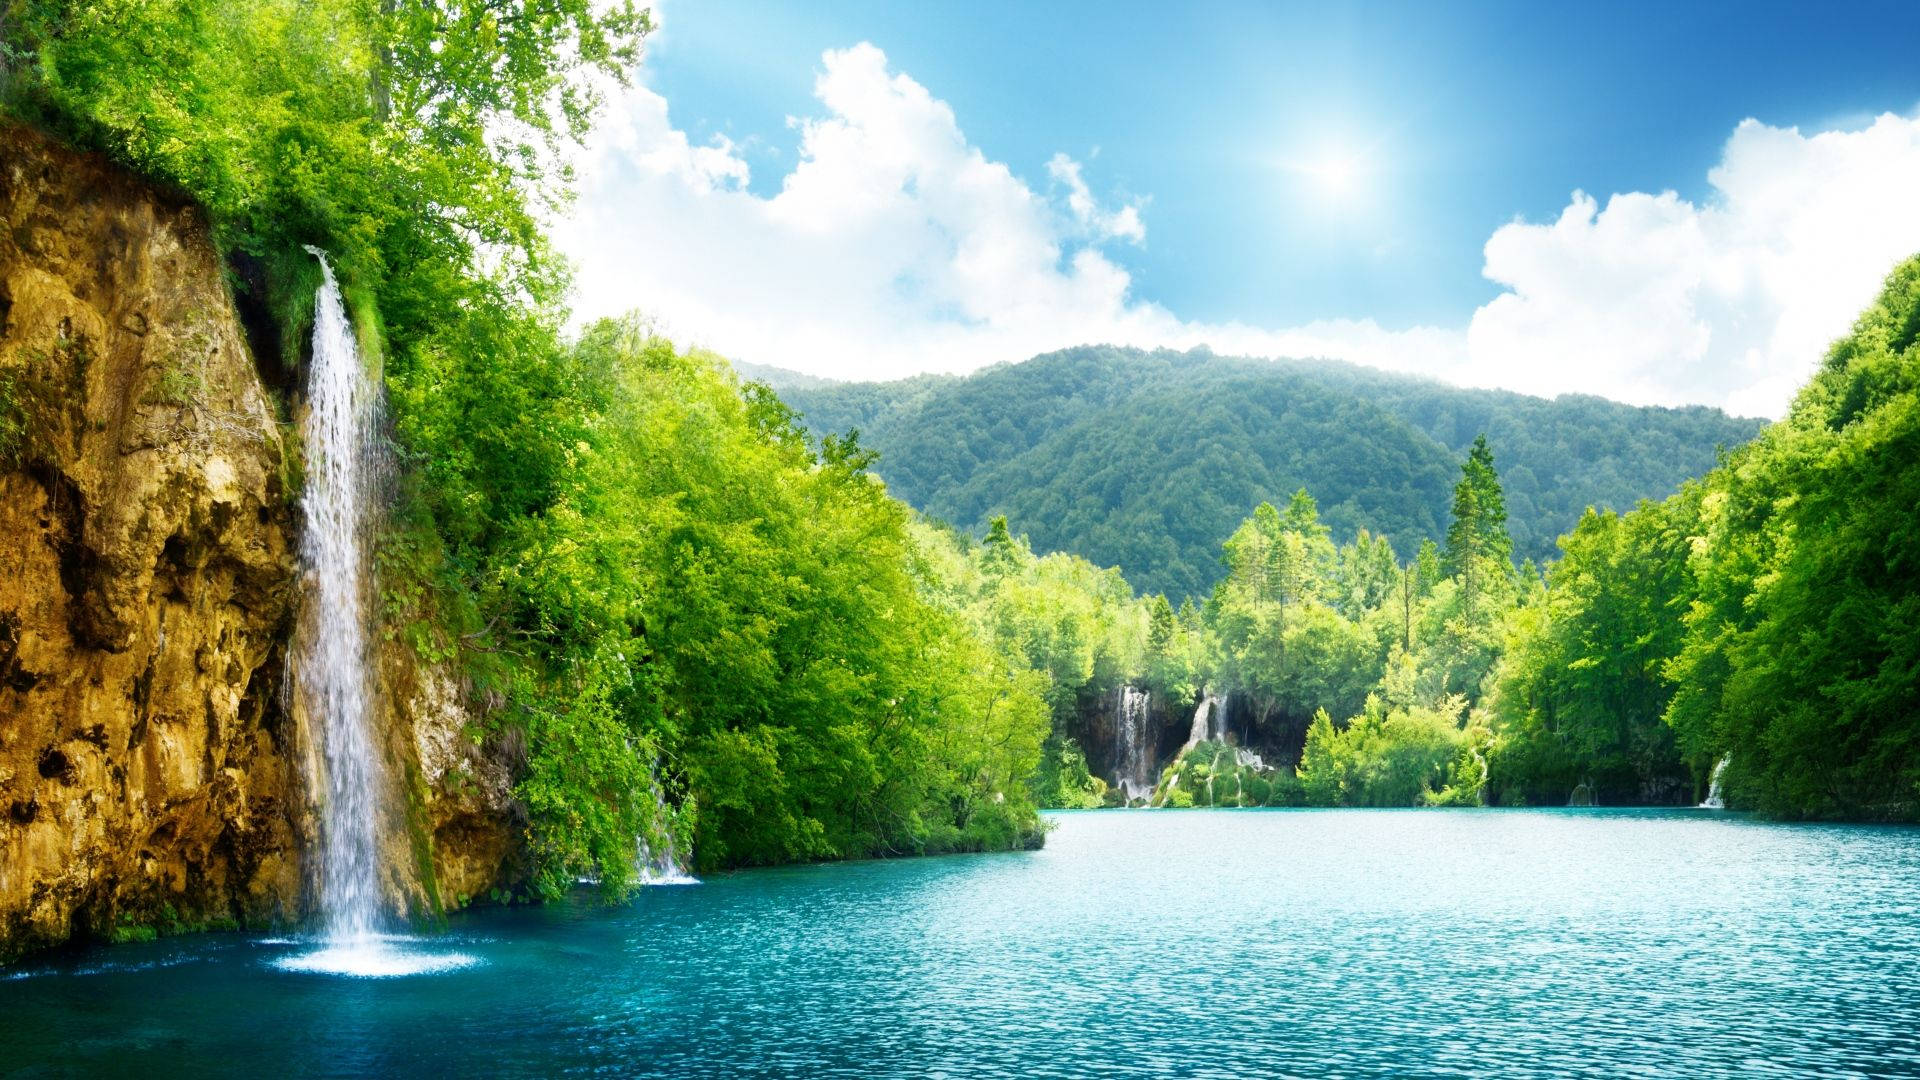

Caption: a waterfall in the middle of a lake

Do you want to upload another image? (y/n): y

Upload an image (or cancel to stop)...


Saving 360_F_666874684_iHm6UxLjRsR0RjeN1IsFp69Rps1QCDuZ.jpg to 360_F_666874684_iHm6UxLjRsR0RjeN1IsFp69Rps1QCDuZ (1).jpg


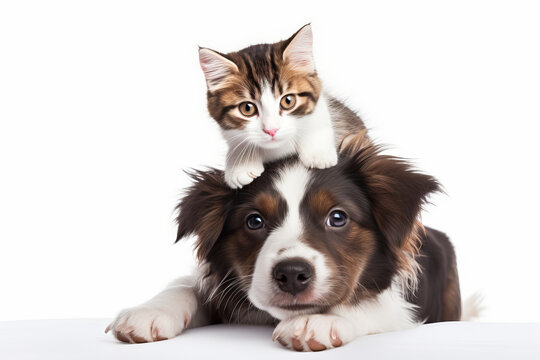

Caption: a cat sitting on top of a dog

Do you want to upload another image? (y/n): y

Upload an image (or cancel to stop)...


Saving nature-wallpaper-500x500.jpg to nature-wallpaper-500x500.jpg


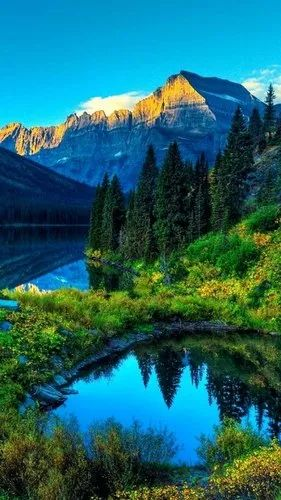

Caption: a lake surrounded by trees and mountains

Do you want to upload another image? (y/n): n

All generated captions:
nature-2ygv7ssy2k0lxlzu (1).jpg -> a waterfall in the middle of a lake
360_F_666874684_iHm6UxLjRsR0RjeN1IsFp69Rps1QCDuZ (1).jpg -> a cat sitting on top of a dog
nature-wallpaper-500x500.jpg -> a lake surrounded by trees and mountains


In [ ]:
#  A SIMPLE  CONTINUOUS IMAGE UPLOAD & CAPTIONING  PYTHON PROGRAM

from google.colab import files
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load BLIP n

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.to(device)
model.eval()

def caption_image(image_path):
    """Generate caption for a single image"""
    image = Image.open(image_path).convert("RGB")
    display(image)  # Show the image in notebook

    inputs = processor(images=image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    output_ids = model.generate(**inputs, max_length=50, num_beams=5, early_stopping=True)
    caption = processor.decode(output_ids[0], skip_special_tokens=True)
    return caption

# Dictionary to store all captions
all_captions = {}

# Continuous upload loop

while True:
    print("\nUpload an image (or cancel to stop)...")
    try:
        uploaded = files.upload()
    except Exception as e:
        print("Upload canceled or error:", e)
        break

    if not uploaded:
        print("No file uploaded. Exiting loop.")
        break

    for image_path in uploaded.keys():
        try:
            cap = caption_image(image_path)
            all_captions[image_path] = cap
            print("Caption:", cap)
        except Exception as e:
            print("Error processing", image_path, ":", e)

    # Ask user if they want to continue
    cont = input("\nDo you want to upload another image? (y/n): ").strip().lower()
    if cont != 'y':
        break

# Optional: show all captions summary
print("\nAll generated captions:")
for img, caption in all_captions.items():
    print(f"{img} -> {caption}")